# Practical Introduction to Data Science
1. Data Cleaning
2. Analysis
3. Modeling
4. Review

# Overview
1. Download the data
2. Clean the data

In [62]:
import pandas   as pd
from matplotlib import pyplot as plt
filepath = './train.csv'
df = pd.read_csv(filepath)


In [61]:
!pip install matplotlib

  Using cached matplotlib-3.6.2-cp39-cp39-macosx_11_0_arm64.whl (7.2 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.6-cp39-cp39-macosx_11_0_arm64.whl (226 kB)
  Using cached Pillow-9.4.0-cp39-cp39-macosx_11_0_arm64.whl (3.0 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_11_0_arm64.whl (63 kB)
You should consider upgrading via the '/Users/slimanitz/.pyenv/versions/3.9.5/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
df.head()


# Data Description

# Data Cleaning and Preprocessing

1. Which features are categorical and which are numerical ?
2. Available Data Types ?
3. None, blank, empty values ?

---
## Which Features are categorical and which are numerical ?


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [63]:
print('Categorical Variables')
categorical_variables = df.select_dtypes(include=['object']).columns

for col in categorical_variables:
    print(col)


Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [64]:
print('Numerical Variables')
numerical_variables = df._get_numeric_data().columns
for col in numerical_variables:
    print(col)


Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [65]:
print('Available Data Types:')
df.dtypes


Available Data Types:


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [66]:
print("Number of null per col")
for col in df.columns:
    print(col,df[col].isnull().sum())

Number of null per col
PassengerId 0
HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200
Transported 0


In [67]:
for col in df.columns:
    percentage_null_values = str(df[col].isnull().sum()/len(df))+"%"
    print(col,percentage_null_values)

PassengerId 0.0%
HomePlanet 0.023122052225928908%
CryoSleep 0.02496261359714713%
Cabin 0.02289198205452663%
Destination 0.02093638559760727%
Age 0.020591280340503854%
VIP 0.023352122397331185%
RoomService 0.02082135051190613%
FoodCourt 0.021051420683308408%
ShoppingMall 0.02392729782583688%
Spa 0.021051420683308408%
VRDeck 0.021626596111814105%
Name 0.023007017140227768%
Transported 0.0%


In [22]:
len(df)

8693

## Approaches to handle with None values:

Categorical variables:

- Replace None values with the most common value in the column (in the case categorical variables)

Numerical variables:

- Replace the values with the mean (for numerical values , continuous)

In [68]:
for cat_col in categorical_variables:
    if cat_col != "Name":
        df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)

In [69]:
for cat_col in categorical_variables:
    print(cat_col,df[cat_col].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 200


In [70]:
for num_col in numerical_variables:
    df[num_col].fillna(df[num_col].mean(),inplace=True)



In [71]:
for num_col in numerical_variables:
    print(num_col,df[num_col].isnull().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0


# Analysis
 

1. Data Exploration
2. Feature Engineering
3. Data Visualisation

## Data Exploration

In [72]:
df.describe(include='O')

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4803,207,6097,2


In [73]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [74]:
df[df["Name"] == 'Alraium Disivering']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
6296,6665_01,Europa,True,B/222/P,55 Cancri e,17.0,False,0.0,0.0,0.0,0.0,0.0,Alraium Disivering,True
7270,7775_01,Europa,False,C/253/P,55 Cancri e,28.0,False,7.0,489.0,0.0,4.0,6027.0,Alraium Disivering,False


In [75]:
# Drop the name column from the dataset with don't need it anymore
df.drop(['Name'],axis=1,inplace=True)

In [76]:
categorical_variables = df.select_dtypes(include=['object']).columns
categorical_variables

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

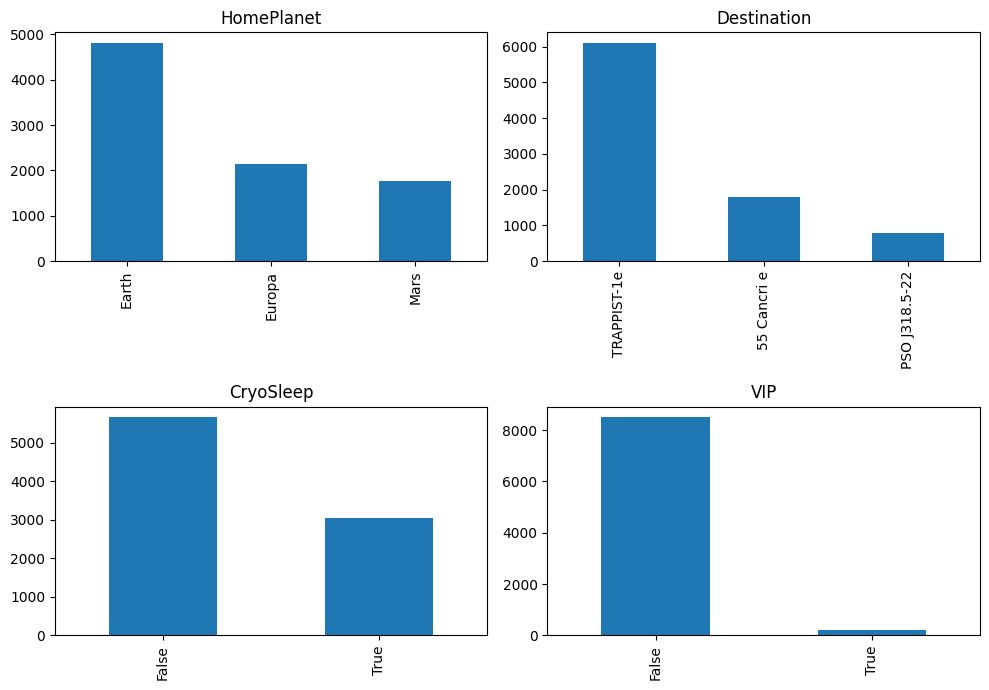

In [82]:
# Plotting
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)

df['HomePlanet'].value_counts().plot(kind='bar',title='HomePlanet')
plt.subplot(2,2,2)

df['Destination'].value_counts().plot(kind='bar',title='Destination')
plt.subplot(2,2,3)

df['CryoSleep'].value_counts().plot(kind='bar',title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout()




In [86]:
numerical_variables = list(numerical_variables)
if "train" in filepath:
    numerical_variables.remove('Transported')

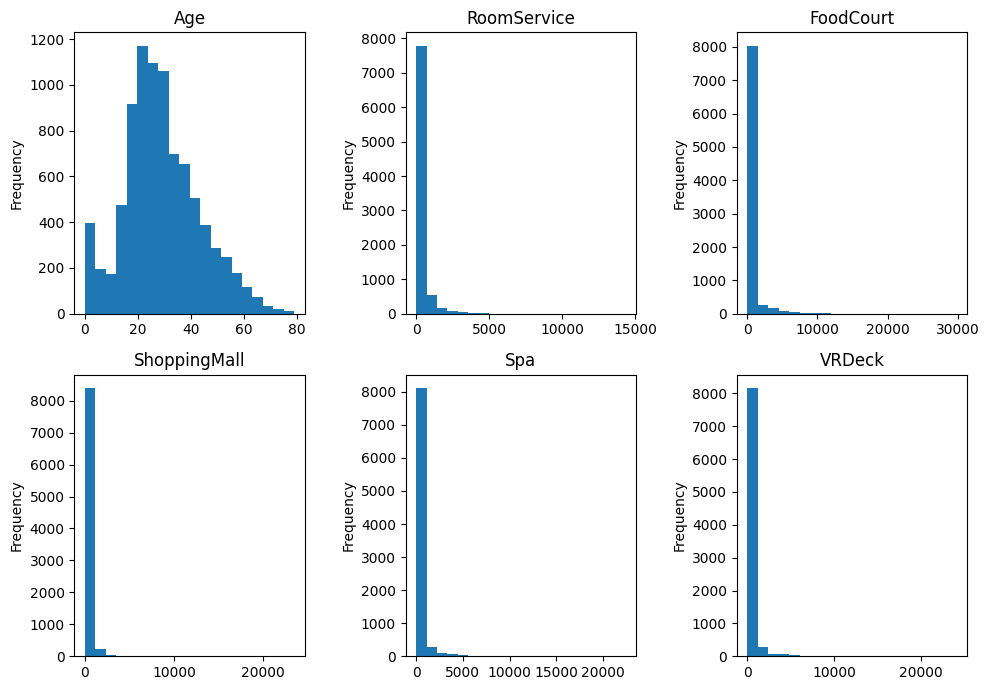

In [87]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(numerical_variables):
    plt.subplot(2,3,i+1)
    df[num_col].plot(kind='hist',bins=20)
    plt.title(num_col)
plt.tight_layout()

# Feature Engineering
1. Build 2 features out of the 'Cabin' column: deck and port
2. Build a feature called group from the passengerid variable (changed my mind! :P)

In [92]:
# building the deck and port features from the cabin column

df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df['Deck'] = df['Deck'].map({'B':0,'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df['Port'] = df['Port'].map({'P':0,'S':1}).astype(int)
df.drop(['Cabin'],axis=1,inplace=True)
df.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [93]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth':0,'Europa':1,'Mars':2}).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [94]:
unique_destinations = df['Destination'].unique()
df['Destination'] = df['Destination'].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)
df['Destination'].head()

0    0
1    0
2    0
3    0
4    0
Name: Destination, dtype: int64

In [ ]:
df